In [26]:
import cv2 # should be 4.7
import glob
import matplotlib.pyplot as plt
import cv2.aruco as aruco
import numpy as np

print( cv2.__version__)

4.7.0


In [27]:
# OUR FINAL CAMERA CALIBRATION MATRIX
calibration = 0.6442544274536695
cameraMatrix = np.array([[932.35252209,   0.,         657.24325896],
 [  0.,         930.23581552, 357.42939289],
 [  0.,           0.,           1.        ]])
distCoeffs = np.array([[ 1.76279343e-01, -6.07952723e-01, -4.64176532e-04, -4.96839648e-04, 6.04867450e-01]])

In [28]:
def produce_cube_points(x, z):
    y = 1.3
    A = np.array([[x, y, z],
                  [x, y -  6., z],
                  [x - 6., y -  6., z],
                  [x - 6., y, z],
                  [x, y, z + 6.],
                  [x, y -  6., z + 6.],
                  [x - 6., y -  6., z + 6.],
                  [x - 6., y, z + 6.]])
    return A

In [29]:
RELATIVE_PATH_CUBE = './*.jpg'
images_cube = sorted(glob.glob(RELATIVE_PATH_CUBE))
print(len(images_cube))

points3dOnCube = np.array([
                        [[-1.15, 1.3, 16.],
                         [-1.15, -4.7, 16.],
                         [-6.3, -4.7, 19.],
                         [-6.3, 1.3, 19.],
                         [2.05, 1.3, 21.0],
                         [2.05, -4.7, 21.0],
                         [-3.35, -4.7, 24.1],
                         [-3.35, 1.3, 24.1]],
                        produce_cube_points(-3., 20.)
                        ])


2


./photo_000_2023-04-19.jpg
points3dOnCube1:   [[-1.15  1.3  16.  ]
 [-1.15 -4.7  16.  ]
 [-6.3  -4.7  19.  ]
 [-6.3   1.3  19.  ]
 [ 2.05  1.3  21.  ]
 [ 2.05 -4.7  21.  ]
 [-3.35 -4.7  24.1 ]
 [-3.35  1.3  24.1 ]]
point_2d:   array([[[594, 429]],

       [[593,  97]],

       [[359, 135]],

       [[360, 419]],

       [[744, 412]],

       [[745, 157]],

       [[532, 182]],

       [[532, 406]]], dtype=int32)


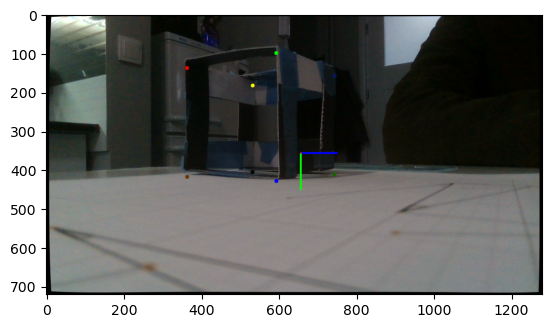

./photo_001_2023-04-19.jpg
points3dOnCube1:   [[-3.   1.3 20. ]
 [-3.  -4.7 20. ]
 [-9.  -4.7 20. ]
 [-9.   1.3 20. ]
 [-3.   1.3 26. ]
 [-3.  -4.7 26. ]
 [-9.  -4.7 26. ]
 [-9.   1.3 26. ]]
point_2d:   array([[[524, 415]],

       [[523, 147]],

       [[251, 146]],

       [[251, 416]],

       [[553, 402]],

       [[553, 194]],

       [[342, 193]],

       [[342, 403]]], dtype=int32)


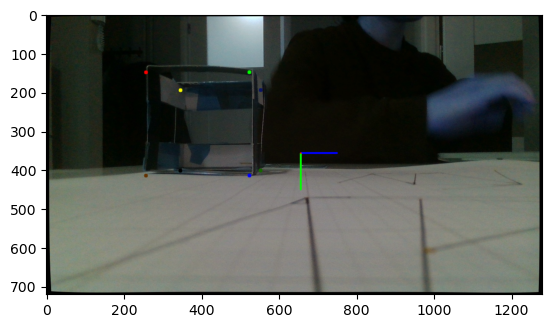

In [30]:
count = 0
for i in range(len(images_cube)):
    if i <= 100:
        points3dOnCube1 = points3dOnCube[i]
        print(images_cube[i])
        img = cv2.imread(images_cube[i])
        
        img = cv2.drawFrameAxes(img, cameraMatrix, distCoeffs, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), 0.1) # draw the chessboard coordinate system

        # project the 3D point onto the image
        point_2d, _ = cv2.projectPoints(points3dOnCube1, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), cameraMatrix, distCoeffs)

        # round the pixel coordinates to integers
        point_2d = np.round(point_2d).astype(np.int32)
        
        print("points3dOnCube1:  ", points3dOnCube1)
        print("point_2d:  ", repr(point_2d))
        colors=[(0, 0, 255), (0, 255, 0), (255, 0, 0), (100, 50, 0), (22, 100, 0), (10, 20, 100), (250, 250, 0), (0, 0, 0), (0, 0, 0)]
    
        c = 0
        for x, y in point_2d[:,0,:]:
            img = cv2.circle(img, (x, y), radius=5, color=colors[c], thickness=-1)
            i += 1
            c += 1

        img = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix) # undistort the image (get's crazy)

        # uncomment this to see the result!
        plt.imshow(img)
        plt.show()
    
    count += 1